## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [3]:
!pip install nlp
!pip install datasets
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/272.9 MB ? eta -:--:--
     --------------------------------------- 0.8/272.9 MB 15.9 MB/s eta 0:00:18
     --------------------------------------- 1.9/272.9 MB 20.3 MB/s eta 0:00:14
     --------------------------------------- 2.1/272.9 MB 22.1 MB/s eta 0:00:13
     --------------------------------------- 2.1/272.9 MB 22.1 MB/s eta 0:00:13
     --------------------------------------- 2.1/272.9 MB 22.1 MB/s eta 0:00:13
     --------------------------------------- 2.1/272.9 MB 22.1 MB/s eta 0:00:13
     ---------------------------------------- 2.2/272.9 MB 6.6 MB/s eta 0:00:42
     ---------------------------------------- 2.2/272.9 MB 6.6 MB/s eta 0:00:42
     ---------------------------------------- 2.3/272.9 MB 5.4 MB/s 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.22.0 requires protobuf<4,>=3.12, but you have protobuf 4.24.1 which is incompatible.


In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.12.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [3]:
from datasets import load_dataset
dataset = load_dataset('dair-ai/emotion')

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [5]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets,labels

In [6]:
tweets, labels = get_tweet(train)

In [7]:
#sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5)
tweets[0], labels[0]    

('i didnt feel humiliated', 0)

## Task 4: Tokenizer

1. Tokenizing the tweets

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [10]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [11]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

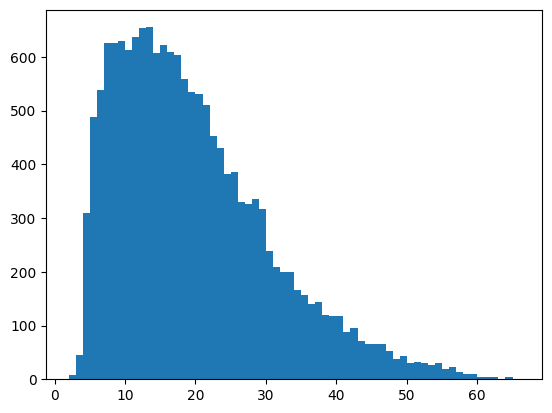

In [12]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins = len(set(lengths)))
plt.show()

In [14]:
maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post',padding='post', maxlen=maxlen)
  return padded

In [18]:
padded_train_seq = get_sequences(tokenizer,tweets)
train_labels = np.array((labels))
train_labels.shape

(16000,)

In [19]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

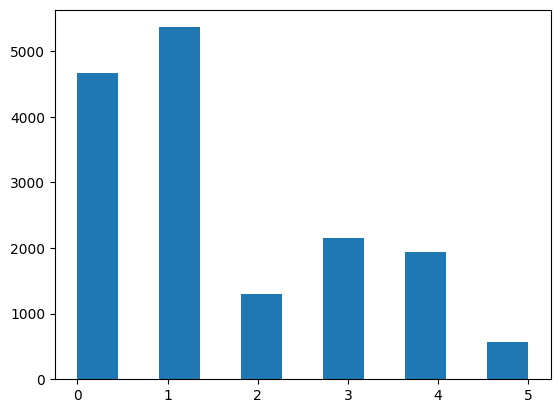

In [20]:
plt.hist(labels ,bins=11)
plt.show()
#sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5)

## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax'),
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [22]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)

In [23]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)

(2000,)


('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [25]:
model_1 = model.fit(
    padded_train_seq, train_labels,
    validation_data = (val_seq, val_labels),
    epochs = 10,
    #callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)]
)

Epoch 1/10
500/500 [==============================] - 17s 22ms/step - loss: 1.3394 - accuracy: 0.4842 - val_loss: 0.9820 - val_accuracy: 0.6535
Epoch 2/10
500/500 [==============================] - 10s 20ms/step - loss: 0.6930 - accuracy: 0.7593 - val_loss: 0.5906 - val_accuracy: 0.8125
Epoch 3/10
500/500 [==============================] - 10s 20ms/step - loss: 0.3776 - accuracy: 0.8784 - val_loss: 0.4645 - val_accuracy: 0.8480
Epoch 4/10
500/500 [==============================] - 10s 20ms/step - loss: 0.2334 - accuracy: 0.9268 - val_loss: 0.4721 - val_accuracy: 0.8605
Epoch 5/10
500/500 [==============================] - 10s 20ms/step - loss: 0.1638 - accuracy: 0.9469 - val_loss: 0.4730 - val_accuracy: 0.8725
Epoch 6/10
500/500 [==============================] - 10s 20ms/step - loss: 0.1261 - accuracy: 0.9609 - val_loss: 0.4378 - val_accuracy: 0.8770
Epoch 7/10
500/500 [==============================] - 12s 24ms/step - loss: 0.1027 - accuracy: 0.9696 - val_loss: 0.4286 - val_accuracy:

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

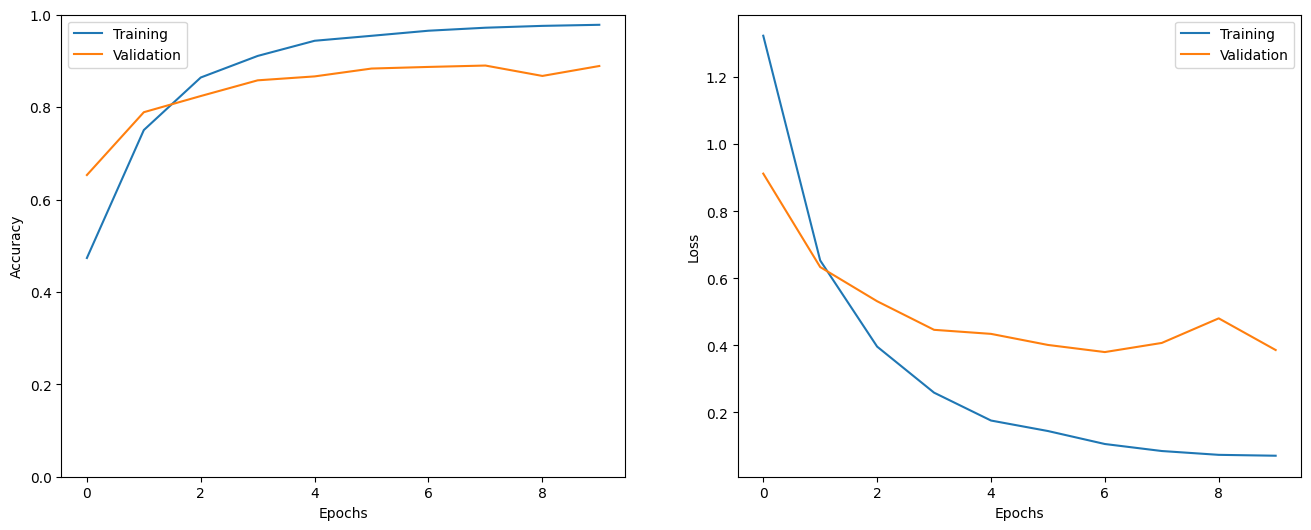

In [76]:
show_history(model_1)

In [26]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = np.array((test_labels))

In [27]:
_ = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 1s 8ms/step - loss: 0.4046 - accuracy: 0.8910


In [28]:
#sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5)
lbl_to_emotion = {
    0 : 'sadness',
    1 : 'joy',
    2 : 'love',
    3 : 'anger',
    4 : 'fear',
    5 : 'surprise'
}

In [30]:
i = random.randint(0,len(test_labels)-1)
print(test_tweets[0])
print('Sentence:',test_tweets[i])
print('Emotion:',lbl_to_emotion[test_labels[i]])

a = np.array('i am not feeling good')

p = model.predict(np.expand_dims(test_seq[i], axis=0))[0]
#p = model.predict(a)
pred_class = lbl_to_emotion[np.argmax(p).astype('uint8')]
print('Predicted Emotion: ',pred_class)

im feeling rather rotten so im not very ambitious right now
Sentence: i hope everyone can help with charity work without feeling stressed about such things
Emotion: sadness
1/1 [==============================] - 2s 2s/step
Predicted Emotion:  sadness
